In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eigh
# Set seed for reproducibility
np.random.seed(123)

# Function to generate data points with noise
def generate_data(radius, n_points, noise_sd):
    theta = np.random.uniform(0, 2 * np.pi, n_points)    
    x = radius * np.cos(theta) + np.random.normal(0, noise_sd, n_points)
    y = radius * np.sin(theta) + np.random.normal(0, noise_sd, n_points)
    return np.column_stack((x, y))

# Generate data for three concentric clusters
data1 = generate_data(1, 150, 0.25**2)
data2 = generate_data(2.8, 150, 0.25**2)
data3 = generate_data(5, 150, 0.25**2)

# Combine data into one dataset
dataset = np.vstack((data1, data2, data3))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


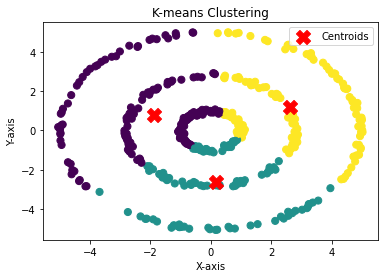

In [2]:
# 1. K-means clustering
kmeans_result = KMeans(n_clusters=3, random_state=123).fit(dataset)

# Plot original data with K-means clustering results
plt.scatter(dataset[:, 0], dataset[:, 1], c=kmeans_result.labels_, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

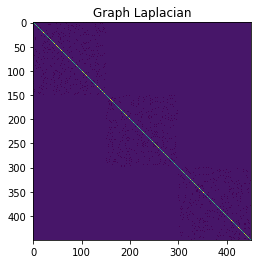

In [3]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import laplacian

# Construct a similarity graph with k-NN (k = 10)
distances = kneighbors_graph(dataset, n_neighbors=10, mode='connectivity', include_self=False)

# Plot the Laplacian matrix
laplacian_matrix = laplacian(distances.toarray(), normed=False)
plt.imshow(laplacian_matrix, cmap='viridis', interpolation='none')
plt.title('Graph Laplacian')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


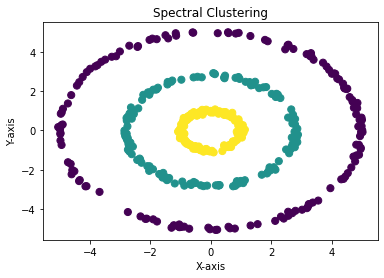

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import spectral_embedding
from scipy.sparse import csgraph
from scipy.linalg import eigh
import matplotlib.pyplot as plt

all_distances = np.linalg.norm(dataset[:, np.newaxis, :] - dataset[np.newaxis, :, :], axis=-1)

# Set the number of nearest neighbors and the sigma parameter for the Gaussian kernel
k = 10
sigma = 1.0

# Construct the similarity graph
n = dataset.shape[0]
graph = np.zeros((n, n))

# Iterate over each point
for i in range(n):
    # Get the distances to the current point
    distances_to_i = all_distances[i]
    
    # Identify the k nearest neighbors, excluding the point itself
    nearest_indices = np.argsort(distances_to_i)[1:k+1]
    
    # Update the graph for the nearest neighbors with Gaussian kernel weights
    graph[i, nearest_indices] = np.exp(- (distances_to_i[nearest_indices] ** 2) / (2 * sigma ** 2))

# Ensure the graph is symmetrical
graph = np.maximum(graph, graph.T)

# Construct Laplacian matrix
laplacian = csgraph.laplacian(graph, normed=False)

# Compute eigenvalues and eigenvectors of the Laplacian
eigenvalues, eigenvectors = eigh(laplacian)

# Choose the top two eigenvectors as features
feature_matrix = eigenvectors[:, 1:3]

# Perform KMeans clustering on the feature matrix
kmeans = KMeans(n_clusters=3, random_state=123).fit(feature_matrix)

# Visualize the clustered data
plt.scatter(dataset[:, 0], dataset[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50)
plt.title('Spectral Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()